In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
import safeopt
import heapq

In [2]:
n = 5 # You can change this value to whatever number of rows you want

latent_dim = 1

# Generate random values for each vector
x1 = np.random.uniform(2,4,n)
x2 = np.random.uniform(2,4,n)
x3 = np.random.uniform(2,4,n)

print("x1:", x1)

# Combine these vectors into a single matrix with n rows and 3 columns
matrix = np.column_stack((x1, x2, x3))

# Display the resulting matrix
print("Matrix:\n", matrix)

print("nubmer of rows:", matrix.shape[0])
print("number of columns:", matrix.shape[1])


x1: [3.74228317 2.26281898 3.66471601 2.40487963 2.71242615]
Matrix:
 [[3.74228317 3.13308758 3.54269828]
 [2.26281898 3.61130861 2.14780861]
 [3.66471601 3.90815841 2.55266332]
 [2.40487963 3.26662326 3.82330504]
 [2.71242615 2.33646902 3.08541254]]
nubmer of rows: 5
number of columns: 3


In [3]:


kernel = GPy.kern.RBF(latent_dim)


model_gplvm =GPy.models.GPLVM(matrix,latent_dim,kernel=kernel,init='PCA')
model_gplvm.optimize(max_iters=1000)

model_gplvm.posterior.mean




array([[3.38579972, 3.30250136, 3.39425893],
       [2.52325603, 3.62189495, 2.06242593],
       [3.37605366, 3.77003744, 2.74927318],
       [2.8575462 , 2.83106418, 3.4490707 ],
       [2.60849413, 2.64137526, 3.41640182]])

In [4]:
print(model_gplvm.kern.K(model_gplvm.X,model_gplvm.X))


[[6.22950342 4.58796007 5.6155951  6.06499669 5.93063871]
 [4.58796007 6.22950342 5.90595113 3.72744774 3.41786207]
 [5.6155951  5.90595113 6.22950342 4.92044065 4.63456898]
 [6.06499669 3.72744774 4.92044065 6.22950342 6.20848286]
 [5.93063871 3.41786207 4.63456898 6.20848286 6.22950342]]


In [5]:
K_xx = model_gplvm.kern.K(model_gplvm.Y,model_gplvm.Y)
K_xx_inv = np.linalg.inv(K_xx)

X: marks the latent space

In [6]:
#print input space
print("X",X)

#x1 is a new random actions
x1 = np.random.uniform(-1.5,1.5,1)
x2 = 0.1


#get latent space
X1 = model_gplvm.X[:,:]
print(model_gplvm.Y.ndim)
print(model_gplvm.X.ndim)
print("Z",X1)
#x* is the new action vector containing hypotherical actions taken from all agents
#it is shape 1,3 as it is a single action
x_star = np.vstack((x1,x2))
print("x*",x_star)

#reshaping into a column vector
x_star = x_star.reshape(1,2)
x_star = x_star.T
print("x* reshaped",x_star)
#k_*z is the covariance between the new action and the latent space
kern = model_gplvm.kern.K(X1,x_star)
print("k_*z",kern)
#k_zz is the covariance between the latent space
k_zz = model_gplvm.kern.K(X1,X1)
print("k_zz",k_zz)
k_zz_inv = np.linalg.inv(k_zz)

#\mu = k_*z(k_zz)^-1*X
mean = np.dot(np.dot(kern.T,k_zz_inv),X1)
print("mean", mean)

variace = model_gplvm.kern.K(x_star,x_star) - np.dot(np.dot(kern.T,k_zz_inv),kern)
print("variance",variace)



NameError: name 'X' is not defined

[[-1.14034206]
 [ 0.09997433]]
  index  |  GPLVM.latent_mean  |  constraints  |  priors
  [0 0]  |        -0.01624405  |               |        
  [1 0]  |         1.18195023  |               |        
  [2 0]  |        -0.24837442  |               |        
  [3 0]  |         0.14743566  |               |        
  [4 0]  |        -1.06476743  |               |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7ba9b9a28500>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ba9b9a29b50>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ba9b9b68140>,
  <matplotlib.collections.PolyCollection at 0x7ba9b9a28a10>]}

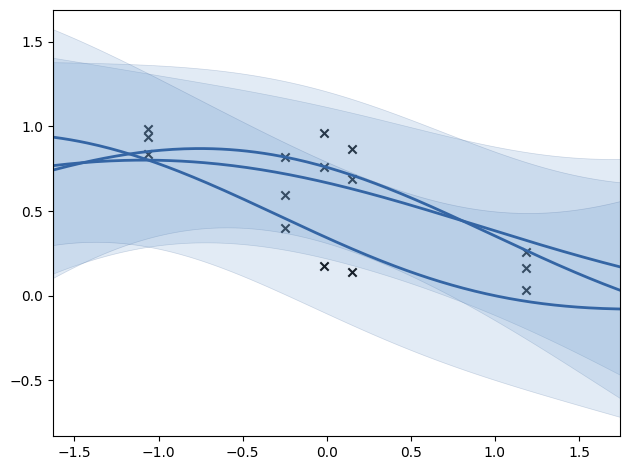

In [ ]:
mean = np.dot(np.dot(kern.T,k_zz_inv),X1)
print(mean)

print(model_gplvm.X)

model_gplvm.plot(visible_dims=[0],labels=None, legend=False)

In [ ]:
# k_II = model_gplvm.kern.K(X,X)
# k_II_inv = np.linalg.inv(k_II)
# print("k_II",k_II)
# X_transpose = model_gplvm.Y.T
# j_column = k_II[:,1].T.reshape(1,2)
# print("j_column",j_column)

# K_Ij = model_gplvm.kern.K(X,j_column)
# print("K_Ij",K_Ij)

# mean = np.dot(X_transpose,np.dot(k_II_inv,K_Ij))
# print("mean",mean)
# print("mean",mean.shape)



In [ ]:
# k_II_2 = model_gplvm.kern.K(X)
# k_II_inv_2 = np.linalg.inv(k_II)
# print("k_II_2",k_II)
# X_transpose_2 = X.T
# j_column_2 = k_II_2[:,0].T.reshape(1,2)
# print("j_column_2",j_column_2)

# K_Ij_2 = model_gplvm.kern.K(X,j_column_2)
# print("K_Ij_2",K_Ij_2)

# mean_2 = np.dot(X_transpose_2,np.dot(k_II_inv_2,K_Ij_2))
# print("mean",mean_2)
# print("mean",mean_2.shape)


In [ ]:
print(model_gplvm.posterior.covariance)
print(model_gplvm.posterior._mean)

[[ 0.01104448  0.00451025  0.01052276  0.01102523  0.00454125]
 [ 0.00451025  0.02962622  0.0009469   0.00746933 -0.00476357]
 [ 0.01052276  0.0009469   0.01117711  0.00973438  0.00897549]
 [ 0.01102523  0.00746933  0.00973438  0.01155723  0.00185643]
 [ 0.00454125 -0.00476357  0.00897549  0.00185643  0.02711909]]
[[ 0.6711814   0.76328122  0.34978547]
 [ 0.3276667   0.2686793  -0.03264064]
 [ 0.71969082  0.81907406  0.45614535]
 [ 0.63158841  0.71281322  0.27804037]
 [ 0.80074567  0.85148777  0.80222692]]


In [ ]:
N = 2
x_test_1 = np.array([0.5928, -1.3193])
x_test_2 = np.random.uniform(-3,3,N)

Y = np.vstack((x_test_1,x_test_2))
print(Y)

[[ 0.5928     -1.3193    ]
 [ 1.0565326  -2.08627725]]


In [ ]:
latent_dim = 1

kern = GPy.kern.RBF(latent_dim)
m= GPy.models.GPLVM(Y,latent_dim,kernel=kernel)
m.optimize(max_iters=1000)

In [ ]:
print(m.posterior.mean)


[[ 0.72356533 -1.52218132]
 [ 0.86057255 -1.74878047]]


In [ ]:
print(m.posterior.covariance)

[[0.08885154 0.04704829]
 [0.04704829 0.08885154]]


{'dataplot': [<matplotlib.collections.PathCollection at 0x7ba9b9bdf830>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ba9b9a7aa50>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ba9b9bd0560>,
  <matplotlib.collections.PolyCollection at 0x7ba9b9a6acc0>]}

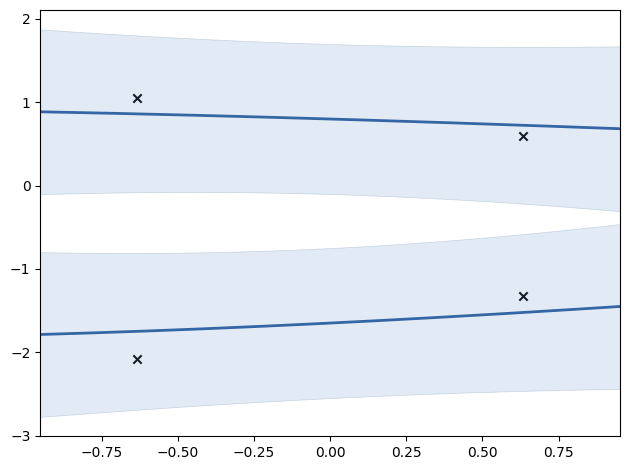

In [ ]:
m.plot(visible_dims=[0],labels=None, legend=False)


In [ ]:
X = m.X[:,:]
print(X)

  index  |  GPLVM.latent_mean  |  constraints  |  priors
  [0 0]  |         0.63424602  |               |        
  [1 0]  |        -0.63424602  |               |        
